In [ ]:
from google.colab import files
files.upload()
import os
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d kazanova/sentiment140
!pip install contractions
!pip install --upgrade keras
import zipfile
with zipfile.ZipFile("sentiment140.zip", 'r') as zip_ref:
    zip_ref.extractall("./")
import os
print(os.listdir())
import pandas as pd
import re
import contractions  # Assure-toi d'installer cette bibliothèque : pip install contractions
from tensorflow import keras
from tensorflow.keras import layers
!pip install emoji

mv: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
Dataset URL: https://www.kaggle.com/datasets/kazanova/sentiment140
License(s): other
sentiment140.zip: Skipping, found more recently modified local copy (use --force to force download)
['.config', 'sentiment140.zip', 'training.1600000.processed.noemoticon.csv', 'sample_data']


In [ ]:
import pandas as pd
df = pd.read_csv("training.1600000.processed.noemoticon.csv", encoding='latin-1', header=None)
cols = ["target", "id", "date", "flag", "user", "text"]
df.columns = cols
print(df.head())

   target          id                          date      flag  \
0       0  1467810369  Mon Apr 06 22:19:45 PDT 2009  NO_QUERY   
1       0  1467810672  Mon Apr 06 22:19:49 PDT 2009  NO_QUERY   
2       0  1467810917  Mon Apr 06 22:19:53 PDT 2009  NO_QUERY   
3       0  1467811184  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY   
4       0  1467811193  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY   

              user                                               text  
0  _TheSpecialOne_  @switchfoot http://twitpic.com/2y1zl - Awww, t...  
1    scotthamilton  is upset that he can't update his Facebook by ...  
2         mattycus  @Kenichan I dived many times for the ball. Man...  
3          ElleCTF    my whole body feels itchy and like its on fire   
4           Karoli  @nationwideclass no, it's not behaving at all....  


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:86: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


Epoch 1/5
8750/8750 ━━━━━━━━━━━━━━━━━━━━ 882s 100ms/step - accuracy: 0.4997 - loss: 0.7244 - val_accuracy: 0.4977 - val_loss: 0.6934
Epoch 2/5
8750/8750 ━━━━━━━━━━━━━━━━━━━━ 910s 99ms/step - accuracy: 0.4997 - loss: 0.6932 - val_accuracy: 0.4977 - val_loss: 0.6932
Epoch 3/5
8750/8750 ━━━━━━━━━━━━━━━━━━━━ 860s 98ms/step - accuracy: 0.4993 - loss: 0.6932 - val_accuracy: 0.4977 - val_loss: 0.6932
Epoch 4/5
8750/8750 ━━━━━━━━━━━━━━━━━━━━ 861s 98ms/step - accuracy: 0.4994 - loss: 0.6932 - val_accuracy: 0.4977 - val_loss: 0.6932
Epoch 5/5
8750/8750 ━━━━━━━━━━━━━━━━━━━━ 869s 99ms/step - accuracy: 0.5000 - loss: 0.6932 - val_accuracy: 0.4977 - val_loss: 0.6932


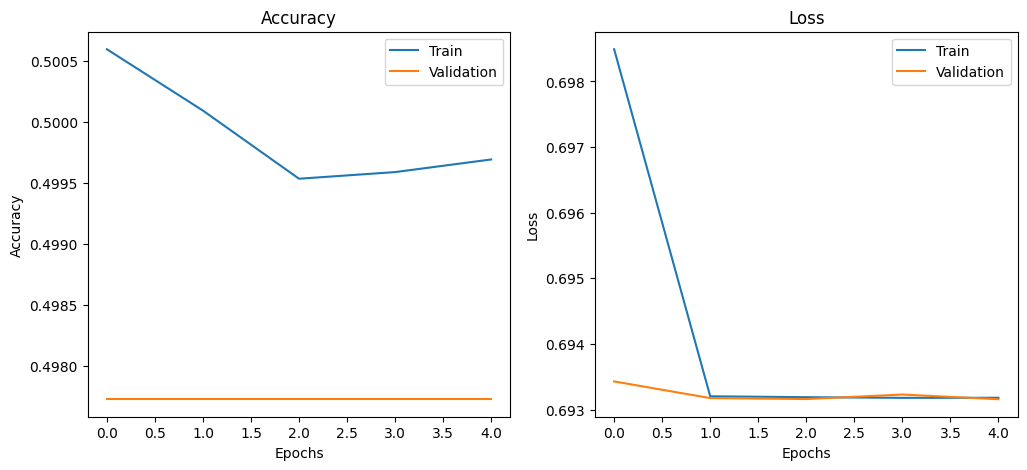


Test Accuracy: 49.96%
Test Loss: 0.6932
Modèle sauvegardé avec succès!


In [ ]:
# Importations nécessaires
import pandas as pd
import numpy as np
import re
import contractions
import emoji
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# Téléchargement des données NLTK
nltk.download('stopwords')
nltk.download('wordnet')

# Préprocessing du texte
def clean_text(text):
    # Conversion des emojis
    text = emoji.demojize(text, delimiters=(" ", " "))

    # Expansion des contractions
    text = contractions.fix(text)

    # Nettoyage du texte
    text = re.sub(r"http\S+|www\S+", "", text)  # URLs
    text = re.sub(r"@\w+", "", text)            # Mentions
    text = re.sub(r"[^a-zA-Z\s]", "", text)     # Caractères spéciaux
    text = text.lower().strip()                 # Minuscules

    # Suppression des stopwords et lemmatisation
    stop_words = set(stopwords.words("english"))
    lemmatizer = WordNetLemmatizer()
    text = " ".join([lemmatizer.lemmatize(word) for word in text.split() if word not in stop_words])

    return text

# Chargement des données
df = pd.read_csv("training.1600000.processed.noemoticon.csv", encoding='latin-1', header=None)
df.columns = ["target", "id", "date", "flag", "user", "text"]
df['target'] = df['target'].replace({4: 1})  # Conversion des labels

# Nettoyage des textes
df['text'] = df['text'].apply(clean_text)

# Tokenization et padding
tokenizer = Tokenizer(num_words=10000, oov_token="<OOV>")
tokenizer.fit_on_texts(df['text'])

sequences = tokenizer.texts_to_sequences(df['text'])
padded_sequences = pad_sequences(sequences, maxlen=50, padding='post')

# Division des données
X_train, X_temp, y_train, y_temp = train_test_split(padded_sequences, df['target'], test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# ----------------------------------------------------------
# Chargement des embeddings pré-entraînés (optionnel)
# ----------------------------------------------------------
"""
# Exemple avec GloVe (à adapter selon votre chemin)
embedding_dim = 100
embedding_index = {}
with open('glove.6B.100d.txt', encoding='utf-8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embedding_index[word] = coefs

embedding_matrix = np.zeros((10000, embedding_dim))
for word, i in tokenizer.word_index.items():
    if i < 10000:
        embedding_vector = embedding_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector
"""

# Architecture du modèle avec régularisation
model = Sequential([
    Embedding(
        input_dim=10000,
        output_dim=64,
        # weights=[embedding_matrix] if using pre-trained else None,
        # trainable=False if using pre-trained else True,
        input_length=50
    ),

    BatchNormalization(),  # Normalisation

    LSTM(
        64,  # Réduction des unités LSTM
        return_sequences=False,
        kernel_regularizer=l2(0.01)  # Régularisation L2
    ),

    Dropout(0.7),  # Dropout augmenté

    Dense(
        1,
        activation='sigmoid',
        kernel_regularizer=l2(0.01)  # Régularisation L2
    )
])

# Optimizer avec learning rate adaptatif
optimizer = Adam(learning_rate=0.001, decay=1e-6)

model.compile(
    optimizer=optimizer,
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Early Stopping
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True
)

# Entraînement
history = model.fit(
    X_train,
    y_train,
    epochs=5,  # Nombre d'epochs augmenté
    batch_size=128,  # Taille de batch augmentée
    validation_data=(X_val, y_val),
    callbacks=[early_stop],
    verbose=1
)

# Visualisation des performances
plt.figure(figsize=(12, 5))

# Précision
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Perte
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

# Évaluation finale
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print(f"\nTest Accuracy: {test_acc*100:.2f}%")
print(f"Test Loss: {test_loss:.4f}")

# Sauvegarde du modèle
model.save('improved_sentiment_model.h5')
print("Modèle sauvegardé avec succès!")

In [ ]:
df["target"] = df["target"].replace({4: 1})
#vérifier les labels qui étaient a 4 et deviennent a 1
print(df[df["target"] == 1])
print(df.head())

         target          id                          date      flag  \
800000        1  1467822272  Mon Apr 06 22:22:45 PDT 2009  NO_QUERY   
800001        1  1467822273  Mon Apr 06 22:22:45 PDT 2009  NO_QUERY   
800002        1  1467822283  Mon Apr 06 22:22:46 PDT 2009  NO_QUERY   
800003        1  1467822287  Mon Apr 06 22:22:46 PDT 2009  NO_QUERY   
800004        1  1467822293  Mon Apr 06 22:22:46 PDT 2009  NO_QUERY   
...         ...         ...                           ...       ...   
1599995       1  2193601966  Tue Jun 16 08:40:49 PDT 2009  NO_QUERY   
1599996       1  2193601969  Tue Jun 16 08:40:49 PDT 2009  NO_QUERY   
1599997       1  2193601991  Tue Jun 16 08:40:49 PDT 2009  NO_QUERY   
1599998       1  2193602064  Tue Jun 16 08:40:49 PDT 2009  NO_QUERY   
1599999       1  2193602129  Tue Jun 16 08:40:50 PDT 2009  NO_QUERY   

                    user                                               text  
800000             ersle       I LOVE @Health4UandPets u guys r the b

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download("stopwords")
nltk.download("wordnet")
stop_words = set(stopwords.words("english"))
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
import pandas as pd
import re
import contractions
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import emoji

# Download NLTK data
nltk.download("stopwords")
nltk.download("wordnet")

# Initialize NLTK tools
stop_words = set(stopwords.words("english"))
lemmatizer = WordNetLemmatizer()

# Function to clean and preprocess text
def clean_text(text):
    # Convert emojis to text (e.g., 😊 → "smiling_face")
    text = emoji.demojize(text, delimiters=(" ", " "))

    # Fix contractions (e.g., "can't" → "cannot")
    text = contractions.fix(text)

    # Remove URLs
    text = re.sub(r"http\S+|www.\S+", "", text)

    # Remove mentions (@username)
    text = re.sub(r"@\w+", "", text)

    # Remove special characters and numbers
    text = re.sub(r"[^a-zA-Z\s]", "", text)

    # Convert to lowercase
    text = text.lower().strip()

    # Remove stopwords and lemmatize
    text = " ".join([lemmatizer.lemmatize(word) for word in text.split() if word not in stop_words])

    # Handle hashtags (e.g., #HappyBirthday → "happy birthday")
    text = re.sub(r"#(\w+)", lambda match: " ".join(re.findall(r"[A-Z][a-z]*", match.group(1))), text)

    # Handle negations (e.g., "not good" → "not_good")
    text = re.sub(r"\bnot\s+\w+", lambda match: match.group(0).replace(" ", "_"), text)

    return text

# Load the dataset
df = pd.read_csv("training.1600000.processed.noemoticon.csv", encoding="latin-1", header=None)
cols = ["target", "id", "date", "flag", "user", "text"]
df.columns = cols

# Replace target values (4 → 1 for positive sentiment)
df["target"] = df["target"].replace({4: 1})

# Apply text cleaning
df["text"] = df["text"].apply(clean_text)

# Display the first few rows
print(df.head())

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


   target          id                          date      flag  \
0       0  1467810369  Mon Apr 06 22:19:45 PDT 2009  NO_QUERY   
1       0  1467810672  Mon Apr 06 22:19:49 PDT 2009  NO_QUERY   
2       0  1467810917  Mon Apr 06 22:19:53 PDT 2009  NO_QUERY   
3       0  1467811184  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY   
4       0  1467811193  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY   

              user                                               text  
0  _TheSpecialOne_       awww bummer shoulda got david carr third day  
1    scotthamilton  upset cannot update facebook texting might cry...  
2         mattycus    dived many time ball managed save rest go bound  
3          ElleCTF                    whole body feel itchy like fire  
4           Karoli                            behaving mad cannot see  


In [ ]:
!pip show tensorflow

Name: tensorflow
Version: 2.18.0
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: /usr/local/lib/python3.11/dist-packages
Requires: absl-py, astunparse, flatbuffers, gast, google-pasta, grpcio, h5py, keras, libclang, ml-dtypes, numpy, opt-einsum, packaging, protobuf, requests, setuptools, six, tensorboard, tensorflow-io-gcs-filesystem, termcolor, typing-extensions, wrapt
Required-by: dopamine_rl, tensorflow-text, tf_keras


In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer

# Définir le tokenizer avec un vocabulaire de 10 000 mots max
tokenizer = Tokenizer(num_words=10000, oov_token="<OOV>")

# Apprendre le vocabulaire du dataset
tokenizer.fit_on_texts(df["text"])

# Convertir les textes en séquences d'indices
df["tokens"] = tokenizer.texts_to_sequences(df["text"])

print(df[["text", "tokens"]].head())


                                                text  \
0       awww bummer shoulda got david carr third day   
1  upset cannot update facebook texting might cry...   
2    dived many time ball managed save rest go bound   
3                    whole body feel itchy like fire   
4                            behaving mad cannot see   

                                              tokens  
0           [808, 1018, 3110, 8, 675, 8740, 1641, 2]  
1  [608, 12, 270, 418, 1803, 181, 266, 949, 71, 1...  
2         [1, 202, 14, 823, 1434, 712, 342, 7, 2850]  
3                       [305, 632, 35, 2614, 6, 953]  
4                                [9267, 459, 12, 20]  


In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
max_length = 50
# Appliquer le padding (ajoute des zéros à droite des séquences courtes)
padded_sequences = pad_sequences(df["tokens"], maxlen=max_length, padding="post")
print(padded_sequences[:5])  # Affiche les 5 premières séquences

[[ 808 1018 3110    8  675 8740 1641    2    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0]
 [ 608   12  270  418 1803  181  266  949   71   11  164 1003    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0]
 [   1  202   14  823 1434  712  342    7 2850    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0]
 [ 305  632   35 2614    6  953    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0 

In [ ]:
print(df.head())  # Display the first few rows of the DataFrame


   target          id                          date      flag  \
0       0  1467810369  Mon Apr 06 22:19:45 PDT 2009  NO_QUERY   
1       0  1467810672  Mon Apr 06 22:19:49 PDT 2009  NO_QUERY   
2       0  1467810917  Mon Apr 06 22:19:53 PDT 2009  NO_QUERY   
3       0  1467811184  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY   
4       0  1467811193  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY   

              user                                               text  \
0  _TheSpecialOne_       awww bummer shoulda got david carr third day   
1    scotthamilton  upset cannot update facebook texting might cry...   
2         mattycus    dived many time ball managed save rest go bound   
3          ElleCTF                    whole body feel itchy like fire   
4           Karoli                            behaving mad cannot see   

                                              tokens  
0           [808, 1018, 3110, 8, 675, 8740, 1641, 2]  
1  [608, 12, 270, 418, 1803, 181, 266, 949, 71, 1...  
2    

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words=10000, oov_token="<OOV>")
tokenizer.fit_on_texts(df["text"])
df["tokens"] = tokenizer.texts_to_sequences(df["text"])

max_length = 100
padded_sequences = pad_sequences(df["tokens"], maxlen=max_length, padding="post")

In [ ]:
from sklearn.model_selection import train_test_split

X = padded_sequences
y = df["target"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

model = Sequential()
model.add(Embedding(input_dim=10000, output_dim=64, input_length=100))
model.add(LSTM(128, return_sequences=False))
model.add(Dropout(0.7))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

history = model.fit(X_train, y_train, epochs=10, batch_size=128, validation_split=0.2)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
8000/8000 ━━━━━━━━━━━━━━━━━━━━ 2500s 312ms/step - accuracy: 0.4997 - loss: 0.6934 - val_accuracy: 0.5001 - val_loss: 0.6932
Epoch 2/10
8000/8000 ━━━━━━━━━━━━━━━━━━━━ 2563s 315ms/step - accuracy: 0.5003 - loss: 0.6932 - val_accuracy: 0.5001 - val_loss: 0.6932
Epoch 3/10
7596/8000 ━━━━━━━━━━━━━━━━━━━━ 1:53 281ms/step - accuracy: 0.6126 - loss: 0.6182

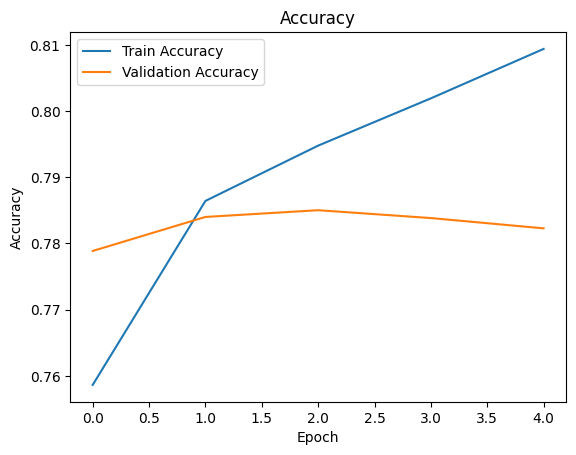

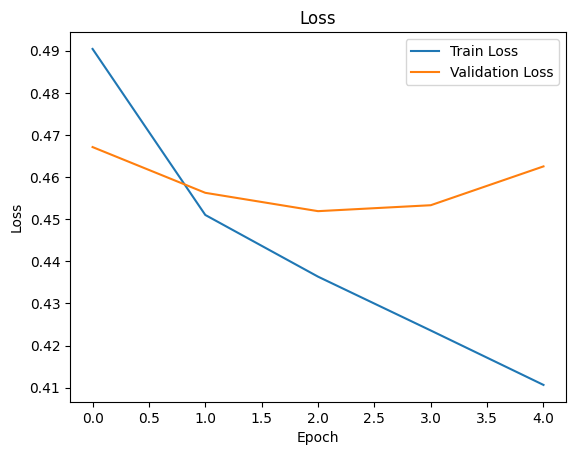

10000/10000 ━━━━━━━━━━━━━━━━━━━━ 152s 15ms/step
Accuracy: 78.13%
Confusion Matrix:
[[128635  30859]
 [ 39123 121383]]


In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

from sklearn.metrics import accuracy_score, confusion_matrix

y_pred = (model.predict(X_test) > 0.5).astype("int32")
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)